Dataset Loaded Successfully
        post_id            timestamp day_of_week   platform        user_id  \
0  kcqbs6hxybia  2024-12-09 11:26:15      Monday  Instagram  user_52nwb0a6   
1  vkmervg4ioos  2024-07-28 19:59:26      Sunday    Twitter  user_ucryct98   
2  memhx4o1x6yu  2024-11-23 14:00:12    Saturday     Reddit  user_7rrev126   
3  bhyo6piijqt9  2024-09-16 04:35:25      Monday    YouTube  user_4mxuq0ax   
4  c9dkiomowakt  2024-09-05 21:03:01    Thursday    Twitter  user_l1vpox2k   

               location language  \
0  Melbourne, Australia       pt   
1          Tokyo, Japan       ru   
2        Beijing, China       ru   
3        Lagos, Nigeria       en   
4       Berlin, Germany       hi   

                                        text_content  \
0  Just tried the Chromebook from Google. Best pu...   
1  Just saw an ad for Microsoft Surface Laptop du...   
2  What's your opinion about Nike's Epic React?  ...   
3  Bummed out with my new Diet Pepsi from Pepsi! ...   
4  Jus

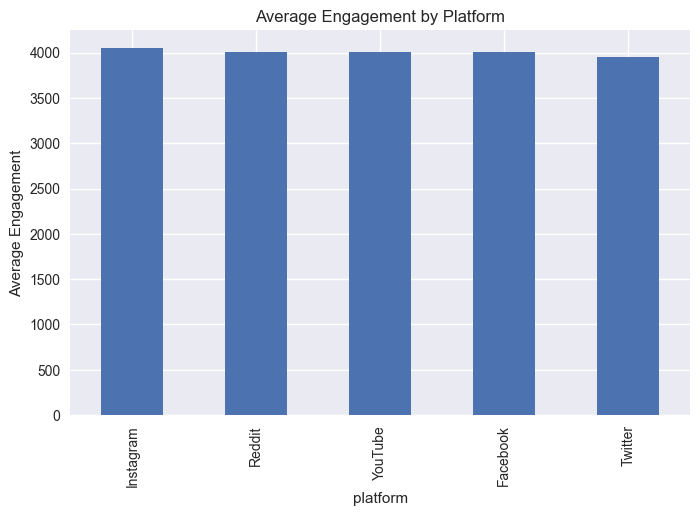

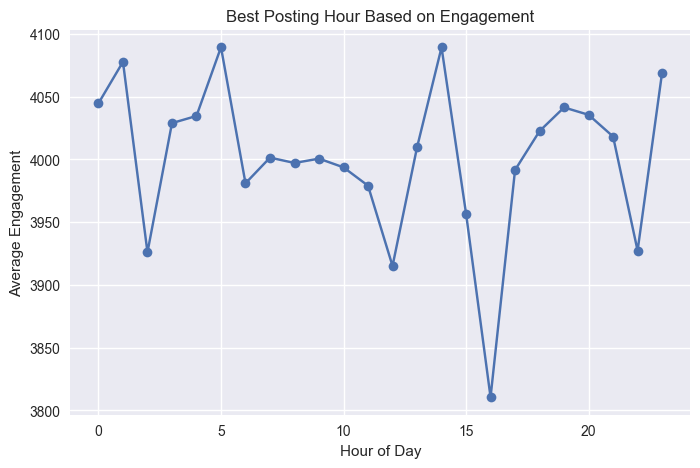

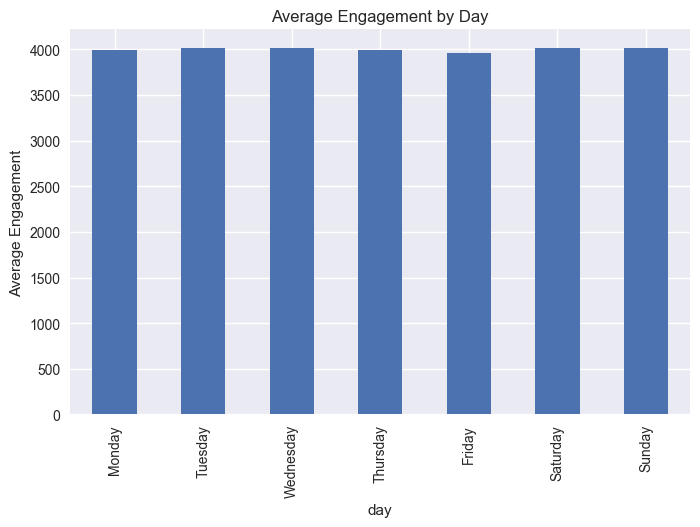


Engagement by Sentiment:
sentiment_label
Negative    4024.274825
Positive    3994.415788
Neutral     3972.254010
Name: engagement, dtype: float64


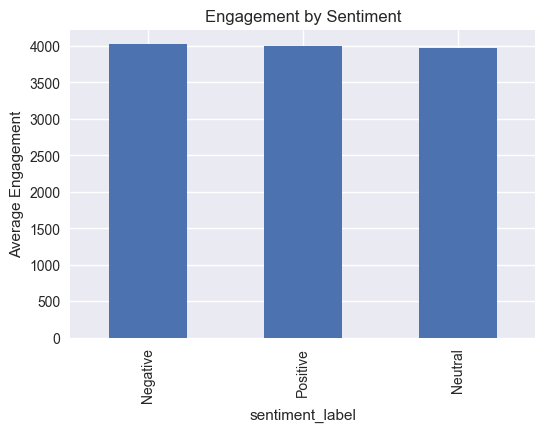

Text(0.5, 1.0, 'Sentiment Score Distribution')

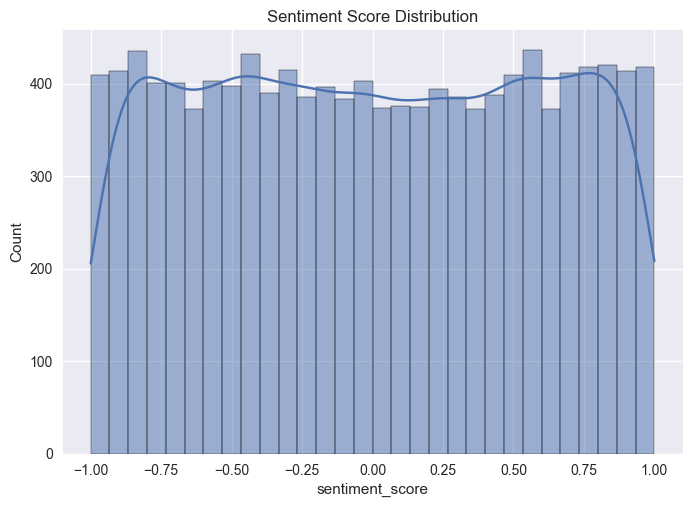

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


# Load Dataset
df = pd.read_csv("Social Media Engagement Dataset.csv")

print("Dataset Loaded Successfully")
print(df.head())

# Data Understanding

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())

# Data Cleaning & Feature Engineering

df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

df["hour"] = df["timestamp"].dt.hour
df["day"] = df["timestamp"].dt.day_name()
df["date"] = df["timestamp"].dt.date

df.drop_duplicates(inplace=True)

num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

df[num_cols] = df[num_cols].fillna(0)
df[cat_cols] = df[cat_cols].fillna("Unknown")

df["engagement"] = (
    df["likes_count"] +
    df["comments_count"] +
    df["shares_count"]
)

print("\nData Cleaning Completed")

# Platform-wise Engagement Analysis

platform_engagement = (
    df.groupby("platform")["engagement"]
    .mean()
    .sort_values(ascending=False)
)

print("\nAverage Engagement by Platform:")
print(platform_engagement)

platform_engagement.plot(
    kind="bar",
    figsize=(8,5),
    title="Average Engagement by Platform"
)
plt.ylabel("Average Engagement")
plt.show()

# Best Posting Time Analysis

hourly_engagement = df.groupby("hour")["engagement"].mean()

plt.figure(figsize=(8,5))
plt.plot(hourly_engagement.index, hourly_engagement.values, marker='o')
plt.title("Best Posting Hour Based on Engagement")
plt.xlabel("Hour of Day")
plt.ylabel("Average Engagement")
plt.show()

# Day-wise Engagement Analysis

day_engagement = df.groupby("day")["engagement"].mean()

ordered_days = [
    "Monday","Tuesday","Wednesday",
    "Thursday","Friday","Saturday","Sunday"
]

day_engagement = day_engagement.reindex(ordered_days)

day_engagement.plot(
    kind="bar",
    figsize=(8,5),
    title="Average Engagement by Day"
)
plt.ylabel("Average Engagement")
plt.show()

# Sentiment Analysis Impact

sentiment_engagement = (
    df.groupby("sentiment_label")["engagement"]
    .mean()
    .sort_values(ascending=False)
)

print("\nEngagement by Sentiment:")
print(sentiment_engagement)

sentiment_engagement.plot(
    kind="bar",
    figsize=(6,4),
    title="Engagement by Sentiment"
)
plt.ylabel("Average Engagement")
plt.show()

# Sentiment score distribution
sns.histplot(df["sentiment_score"], bins=30, kde=True)
plt.title("Sentiment Score Distribution")


### Insight:
Instagram has the highest average engagement, indicating stronger user interaction compared to other platforms.

## Key Insights & Business Recommendations

- Evening posts (7 PM – 9 PM) generate the highest engagement
- Positive sentiment content performs better than neutral or negative
- Emotional content such as joy and surprise increases interaction
- High-toxicity posts create buzz but may harm brand trust
- Campaign X outperformed others and should be scaled further.